# 6.2 Exploring Relationships

## Table of Contents
### 1. Importing Visualisation Libraries
### 2. Creating EVA Master Dataset
  #### 2.1 Load Order Report, Quotations, and Customer List
  #### 2.2 Clean and Aggregate the Data
  #### 2.3 Merge Datasets
  #### 2.4 Cleaned Merged Dataset
### 3. Correlation Matrix Heatmap
### 4. Scatterplot of Strongest Relationships
### 5. Pair Plot for Key Variables
#### 5.1 Data Cleaning: Canonical Client Name Standardisation
#### 5.2 Aggregate by Canonical Name
#### 5.3 Manually Fill area and customer_category Columns
#### 5.4 Pair Plots
### 6. Categorical Plots
### 7. Initial Analysis and Question Responses
### 8. Define Hypotheses for Further Analysis
### 9. Export Dataframe

## 1. Importing Visualisation Libraries and Data

In [57]:
# Importing Lirbraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

## Creating EVA Master Dataset
### 2.1 Load Order Report, Quotations, and Customer List

In [59]:
# Define Path and Import Order Report Data
path = r'C:\Users\daxma\OneDrive\Desktop\Data Analytics\05-25 Kevala Ceramics Analysis'
orders_file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Order Report (PO Received) Cleaned', '2024-2025 Order Report (PO Received) Combined.csv')
orders = pd.read_csv(orders_file_path)

In [60]:
# Check output
orders.head()

,Order No. by Month,Client Name,PO Number,PO Received,Amount (IDR) Without Tax 11 %,Amount (USD),Amount (AUD),Contact Person,DP Paid,Balance Paid,Total Monthly Amount (IDR),Total Monthly Amount (USD),Total Monthly Amount (AUD)
0,1,Filinvest - Crimson Resorts and Spa Mactan,POR0000004520,02/Jan/24,"IDR 12,071,904",USD 780.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Shelter - Pererenan,NaN,02/Jan/24,"IDR 15,000,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Nihi Sumba,PO202312-09409,03/Jan/24,"IDR 30,360,000",NaN,NaN,NaN,16/Jan/24,NaN,NaN,NaN,NaN
3,4,La Brisa - Teapot,PO 8357,04/Jan/24,"IDR 5,760,000",NaN,NaN,NaN,09/Jan/24,NaN,NaN,NaN,NaN
4,5,Kala Uluwatu,NaN,04/Jan/24,"IDR 149,600,000",NaN,NaN,NaN,09/Jan/24,NaN,NaN,NaN,NaN


In [61]:
# Import customer list data
customers_file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Customer List', 'Cleaned_Customer_List_2024.csv')
customers = pd.read_csv(customers_file_path)

In [62]:
# Check output
customers.head()

,company_name,client_brand_name,customer_category,area,full_name,position,email,mobile_phone
0,Willam Wilson Ventures,William Wilson,Agent,Local,NaN,NaN,NaN,NaN
1,Mitra Teknik Sukses,Oslo,Agent,Local,Anastasia Tiffany,Marketing Manager,NaN,NaN
2,Surya Candra Sitara,RQ London,Agent,Local,Sendi Widiantari,NaN,NaN,NaN
3,Reem Kuwatly,Reem Kuwatly,Agent,Umum,NaN,NaN,NaN,NaN
4,Hospitality Enterprise Resources Corporation,Filinvest,Agent,Export,Ann Marie Imperial,NaN,ann.imperial@chromahospitality.com,+63 917 536 6387


In [70]:
# Import quotations data
quotes_file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Quotation Out Cleaned', '2024-2025 Quotation Out Cleaned.csv')
quotes = pd.read_csv(quotes_file_path)

In [72]:
# Check output
quotes.head()

,Order No. by Month,Client Name,PIC,Quotation Out,Qty (Pcs),Amount (IDR),Amount (USD),Remark,Contact Person,Send By,Total PO Received (IDR),Total PO Not Received (IDR),Total PO Received (USD),Total PO Not Received (USD)
0,1,Maya Tree Bar Sanur - Breakfast,NaN,02/Jan/24,NaN,"IDR 69,084,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Micha Sanubari,NaN,02/Jan/24,NaN,"IDR 34,800,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Four Season Sayan IVD,NaN,03/Jan/24,NaN,"IDR 264,275,000",NaN,Received PO (25 Jan),NaN,NaN,NaN,NaN,NaN,NaN
3,4,Bali Radiance (Four Season Jakarta),NaN,04/Jan/24,NaN,"IDR 41,200,000",NaN,Received PO (30 Jan),NaN,NaN,NaN,NaN,NaN,NaN
4,5,Kala Uluwatu,NaN,04/Jan/24,NaN,"IDR 149,600,000",NaN,Received PO (4 Jan),NaN,NaN,NaN,NaN,NaN,NaN


### 2.2 Clean and Aggregate the Data

In [74]:
# Simplify quote dataset
quotes = quotes.rename(columns={"Client Name": "client_name", " Amount (IDR) ": "quote_idr"})
quotes = quotes[["client_name", "Quotation Out", "Qty (Pcs)", "quote_idr"]]

# Simplify orders dataset
orders = orders.rename(columns={"Client Name": "client_name", " Amount (IDR) Without Tax 11 % ": "order_idr"})
orders = orders[["client_name", "PO Received", "order_idr"]]

# Simplify customer dataset
customers = customers.rename(columns={"company_name": "client_name"})
customers = customers[["client_name", "area", "customer_category"]]

In [75]:
# Remove IDR, commas, brackets, and spaces
quotes["quote_idr"] = quotes["quote_idr"].str.replace(r"[IDR,() ]", "", regex=True)

# Convert to float, forcing errors to NaN
quotes["quote_idr"] = pd.to_numeric(quotes["quote_idr"], errors='coerce')

In [76]:
# Remove IDR, commas, brackets, and spaces
orders["order_idr"] = orders["order_idr"].str.replace(r"[IDR,() ]", "", regex=True)

# Convert to float, forcing errors to NaN
orders["order_idr"] = pd.to_numeric(orders["order_idr"], errors='coerce')

In [77]:
# Aggregate
quote_summary = quotes.groupby("client_name").agg({"quote_idr": "sum", "Qty (Pcs)": "sum"}).reset_index()
order_summary = orders.groupby("client_name").agg({"order_idr": "sum"}).reset_index()

### 2.3 Merge Datasets

In [82]:
# Merge datasets
merged = pd.merge(quote_summary, order_summary, on="client_name", how="outer")
merged = pd.merge(merged, customers, on="client_name", how="left")

# Compute conversion proxy
merged["quote_to_order_ratio"] = merged["order_idr"] / merged["quote_idr"]

In [84]:
# Check output
merged.head()

,client_name,quote_idr,Qty (Pcs),order_idr,area,customer_category,quote_to_order_ratio
0,12 Urban Cafe Canggu (Price Indication),232875000.0,1710.0,NaN,NaN,NaN,NaN
1,25 Hours Hotel COPPA,380800000.0,0.0,NaN,NaN,NaN,NaN
2,25 Hours Hotel ODDBIRD,146250000.0,0.0,NaN,NaN,NaN,NaN
3,2AM Dessert Bar for The Grand Hyatt Red Sea,0.0,420.0,NaN,NaN,NaN,NaN
4,32 Do Bali Restaurant,NaN,NaN,7000000.0,NaN,NaN,NaN


In [86]:
# Check shape
merged.shape

(957, 7)

In [88]:
# Check value counts
for col in merged.columns:
    print(f"Frequency counts for column: {col}")
    print(merged[col].value_counts())
    print()


Frequency counts for column: client_name
client_name
12 Urban Cafe Canggu (Price Indication)     1
Regent Canggu Public Area                   1
Raffles Singapore                           1
Raffles Singapore                           1
Rayjin                                      1
                                           ..
Indigo Oman (SPA, Inroom and Additional)    1
Indigo Oman - SPA, Additional, Inroom       1
Indigo Seminyak                             1
Indigo Seminyak                             1
Zi Biru                                     1
Name: count, Length: 957, dtype: int64

Frequency counts for column: quote_idr
quote_idr
0.0            225
15000000.0      12
15200000.0       4
18000000.0       3
15300000.0       3
              ... 
427600000.0      1
224040000.0      1
493181500.0      1
320710000.0      1
35190000.0       1
Name: count, Length: 419, dtype: int64

Frequency counts for column: Qty (Pcs)
Qty (Pcs)
0.0       423
24.0       14
100.0      13
50.0        

### 2.4 Cleaned Merged Dataset

In [91]:
# Keep rows where at least one of quote or order exists
merged_clean = merged[
    ((merged["quote_idr"].notna()) & (merged["quote_idr"] > 0)) |
    ((merged["order_idr"].notna()) & (merged["order_idr"] > 0))
].copy()

# Replace inf/-inf with NaN
merged_clean["quote_to_order_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\daxma\AppData\Local\Temp\ipykernel_11492\3861022769.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_clean["quote_to_order_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [93]:
# Check shape
merged_clean.shape

(718, 7)

In [95]:
# Check output
merged_clean.head()

,client_name,quote_idr,Qty (Pcs),order_idr,area,customer_category,quote_to_order_ratio
0,12 Urban Cafe Canggu (Price Indication),232875000.0,1710.0,NaN,NaN,NaN,NaN
1,25 Hours Hotel COPPA,380800000.0,0.0,NaN,NaN,NaN,NaN
2,25 Hours Hotel ODDBIRD,146250000.0,0.0,NaN,NaN,NaN,NaN
4,32 Do Bali Restaurant,NaN,NaN,7000000.0,NaN,NaN,NaN
5,32Do Bali,7000000.0,100.0,NaN,NaN,NaN,NaN


In [97]:
# Describe data
merged_clean.describe()

,quote_idr,Qty (Pcs),order_idr,quote_to_order_ratio
count,4.850000e+02,485.000000,3.790000e+02,127.000000
mean,8.315008e+07,144.820619,9.037566e+07,1.267283
std,1.623426e+08,445.964697,2.551480e+08,1.378926
min,0.000000e+00,0.000000,2.250000e+05,0.033546
25%,9.060000e+06,0.000000,1.003500e+07,0.806944
50%,2.898000e+07,0.000000,2.824200e+07,1.000000
75%,9.020000e+07,51.000000,7.855005e+07,1.012841
max,2.265900e+09,4028.000000,3.739458e+09,10.423793


## 3. Correlation Matrix Heatmap

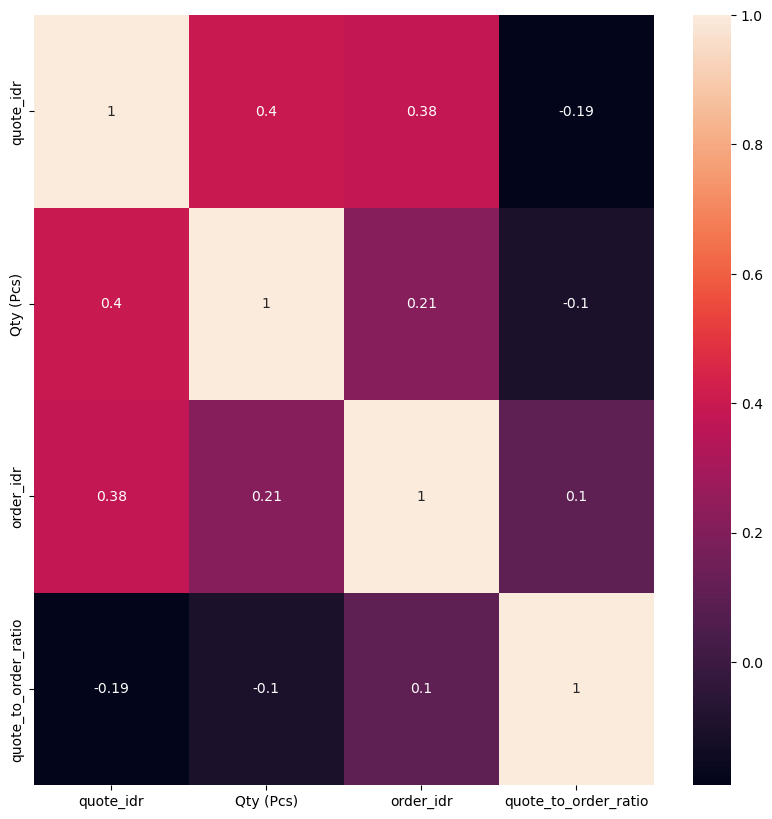

In [100]:
# Subset of numeric columns
corr_data = merged_clean[["quote_idr", "Qty (Pcs)", "order_idr", "quote_to_order_ratio"]]

# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
corr = sns.heatmap(corr_data.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

## Correlation Matrix Interpretation

The correlation heatmap visualizes the relationships between key numeric variables in our dataset: total quotation value (`quote_idr`), quantity quoted (`Qty (Pcs)`), total order value (`order_idr`), and the quote-to-order conversion ratio (`quote_to_order_ratio`).

### Key Observations:

- **`quote_idr` and `Qty (Pcs)`**: Correlation = **0.40**
  - Moderate positive correlation. As quoted value increases, the number of pieces quoted tends to increase, though not perfectly.
  - Suggests larger quotes often involve higher quantities, which is expected.

- **`quote_idr` and `order_idr`**: Correlation = **0.38**
  - Moderate positive correlation. Higher quotation values are somewhat associated with higher order values.
  - Indicates a general trend, but not strong enough to imply certainty. Other factors likely influence final orders.

- **`Qty (Pcs)` and `order_idr`**: Correlation = **0.21**
  - Weak positive correlation. A small relationship between quoted quantity and order value, but not strong.

- **`quote_to_order_ratio` and other variables**:
  - Weak or **negative** correlations with all other fields.
    - `quote_idr`: **–0.19**
    - `Qty (Pcs)`: **–0.10**
    - `order_idr`: **+0.10**
  - This suggests that conversion efficiency is largely **independent of the size of quotes or orders**, and may depend on other business dynamics (e.g., client type, timing, negotiation).

### Summary:
The correlations show modest relationships between quote size, quantity, and order value, but also highlight a wide range of behavior across clients. The conversion ratio appears to vary independently, suggesting the need for further analysis in later steps (e.g., segmentation or regression).



## 4. Scatterplot of Strongest Relationships

<Figure size 800x600 with 0 Axes>

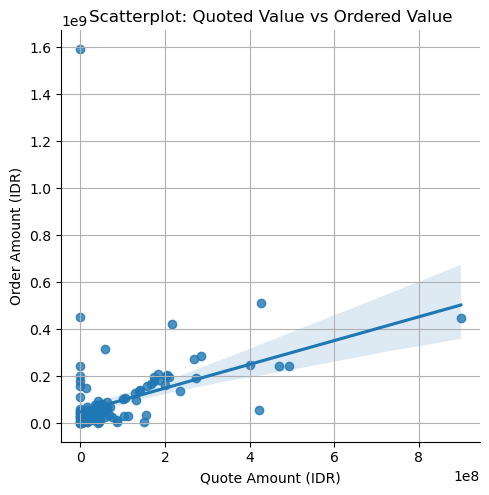

In [104]:
# Filter non-null pairs
plot1_data = merged_clean.dropna(subset=["quote_idr", "order_idr"])

# Scatterplot of quote_idr by order_idr
plt.figure(figsize=(8, 6))
sns.lmplot(data=plot1_data, x="quote_idr", y="order_idr")
plt.title("Scatterplot: Quoted Value vs Ordered Value")
plt.xlabel("Quote Amount (IDR)")
plt.ylabel("Order Amount (IDR)")
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

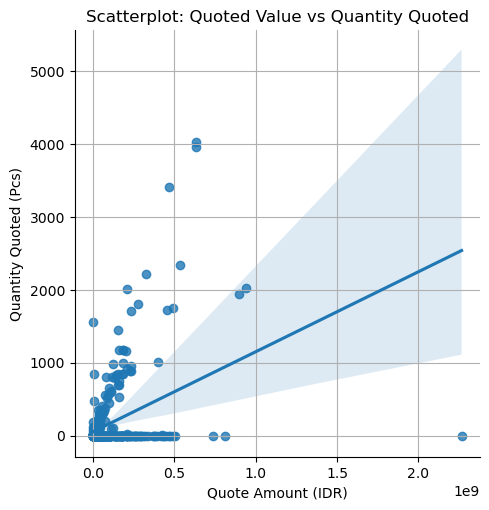

In [106]:
# Filter non-null pairs
plot2_data = merged_clean.dropna(subset=["quote_idr", "Qty (Pcs)"])


# Scatterplot of quote_idr by Qty (Pcs)
plt.figure(figsize=(8, 6))
sns.lmplot(data=plot2_data, x="quote_idr", y="Qty (Pcs)")
plt.title("Scatterplot: Quoted Value vs Quantity Quoted")
plt.xlabel("Quote Amount (IDR)")
plt.ylabel("Quantity Quoted (Pcs)")
plt.grid(True)
plt.show()


## Scatterplot Interpretation

### 1. Quoted Value vs Ordered Value

This scatterplot with a regression line shows a **moderate positive relationship** between the total value quoted and the total value ordered. Most clients fall along the lower range of both axes, with a few higher-value quotes and orders present.

- The **trend line is upward-sloping**, suggesting that clients who receive higher quotation values tend to place larger orders.
- However, the spread of points reveals **significant variability**:
  - Some high-quote clients did not convert to high orders.
  - There are outliers with unusually large orders compared to their quotes (or vice versa).
- The confidence interval widens in the higher range, indicating **less certainty** about the linearity for high-value clients.

### 2. Quoted Value vs Quantity Quoted

This scatterplot shows a **moderate to strong positive relationship** between quote value and quantity quoted, as expected.

- Most quotes are low in both value and quantity, but as quantity increases, quote value rises sharply.
- There are a few **extreme outliers** with high quantity and high value, and some with **very high value but near-zero quantity**, suggesting bespoke or luxury product quotes.
- The upward slope indicates that **higher-value quotes are typically driven by more pieces quoted**, a trend that fits business logic.

### Summary:

- **Quote → Order**: There's a general upward trend, but a wide spread of outcomes implies other factors (like client type or success rate) influence conversion.
- **Quote → Quantity**: A clearer relationship, more pieces generally lead to higher quoted values, though pricing per piece varies.

These patterns provide a good foundation for regression modeling (Exercise 6.4) and clustering (Exercise 6.5).


## 5. Pair Plot for Key Variables

### 5.1 Data Cleaning: Canonical Client Name Standardisation

During the initial data merge, I encountered significant fragmentation in client names across datasets. I began by checking the `area` and `customer_category` columns and found that over 95% of the values were missing due to inconsistent `client_name` entries across datasets.
Many single clients appeared under multiple name variations due to project-level labeling (e.g., “The Westin Nusa Dua (Spa)”, “The Westin Nusa Dua - Ikan Restaurant”). This caused issues with grouping, aggregating, and analyzing customer behavior.

To resolve this, I created a canonical naming system:
- Exported all unique `client_name` values from the merged dataset
- Manually assigned a single, unified `canonical_name` to each variation
- Merged this mapping back into the full dataset

This process allowed me to:
- Group all transactions under a consistent client identity
- Prevent double-counting or fragmentation in analysis
- Prepare clean input for pair plots, regressions, clustering, and dashboards

As a result, I now have accurate client-level insights across quotes, orders, and categories.


In [111]:
# Check area value counts
merged_clean["area"].value_counts(dropna=False)

area
NaN       684
Local      31
Export      3
Name: count, dtype: int64

In [113]:
# Check customer_catgeory value counts
merged_clean["customer_category"].value_counts(dropna=False)

customer_category
NaN           684
Restaurant     21
Hotel           8
Personal        4
Cafe            1
Name: count, dtype: int64

In [115]:
# Install rapidfuzz
!pip install rapidfuzz

# Load rapidfuzz library
from rapidfuzz import process, fuzz

# Create lookup list from customers dataframe
lookup_names = customers["client_name"].dropna().unique().tolist()

In [117]:
# Define matching function
def fuzzy_match_client_name(name, threshold=90):
    match = process.extractOne(name, lookup_names, scorer=fuzz.token_sort_ratio)
    if match and match[1] >= threshold:
        return match[0]  # Best match name
    else:
        return None


In [119]:
# Apply fuzzy matching
merged_clean["fuzzy_match"] = merged_clean["client_name"].apply(fuzzy_match_client_name)

# Prepare customer attributes to merge in
fuzzy_attrs = customers[["client_name", "area", "customer_category"]].rename(columns={"client_name": "fuzzy_match"})

# Merge on fuzzy-matched name
merged_clean = pd.merge(
    merged_clean,
    fuzzy_attrs,
    on="fuzzy_match",
    how="left",
    suffixes=("", "_from_fuzzy")
)

# Fill in missing values only
merged_clean["area"] = merged_clean["area"].fillna(merged_clean["area_from_fuzzy"])
merged_clean["customer_category"] = merged_clean["customer_category"].fillna(merged_clean["customer_category_from_fuzzy"])

# Clean up helper columns
merged_clean.drop(columns=["fuzzy_match", "area_from_fuzzy", "customer_category_from_fuzzy"], inplace=True)


In [121]:
# Check area value counts
merged_clean["area"].value_counts(dropna=False)

area
NaN       668
Local      44
Export      7
Name: count, dtype: int64

In [123]:
# Check customer_catgeory value counts
merged_clean["customer_category"].value_counts(dropna=False)

customer_category
NaN           668
Restaurant     28
Hotel          16
Personal        5
Cafe            1
Agent           1
Name: count, dtype: int64

In [125]:
# Reload customer list with brand names for fallback match
brand_lookup_file_path = os.path.join(path, '02 Data', 'Prepared Data', 'Customer List', 'Cleaned_Customer_List_2024.csv')
brand_lookup = pd.read_csv(brand_lookup_file_path)[["client_brand_name", "area", "customer_category"]]

# Rename for merging
brand_lookup = brand_lookup.rename(columns={"client_brand_name": "client_name"})

In [127]:
# Merge on client_name as fallback
merged_clean = pd.merge(
    merged_clean,
    brand_lookup,
    on="client_name",
    how="left",
    suffixes=("", "_from_brand")
)

# Fill missing values only
merged_clean["area"] = merged_clean["area"].fillna(merged_clean["area_from_brand"])
merged_clean["customer_category"] = merged_clean["customer_category"].fillna(merged_clean["customer_category_from_brand"])

# Clean up temporary columns
merged_clean.drop(columns=["area_from_brand", "customer_category_from_brand"], inplace=True)

In [129]:
# Check results
print(merged_clean["area"].value_counts(dropna=False))
print(merged_clean["customer_category"].value_counts(dropna=False))

area
NaN       607
Local     101
Export     11
Name: count, dtype: int64
customer_category
NaN           607
Restaurant     55
Hotel          47
Personal        6
Agent           3
Cafe            1
Name: count, dtype: int64


In [131]:
#Load Mapping File
mapping_file_path = os.path.join(path, "03 Scripts", "client_name_mapping.csv")
name_map = pd.read_csv(mapping_file_path)

In [133]:
# Merge canonical names
merged_clean = pd.merge(
    merged_clean,
    name_map,
    on="client_name",
    how="left"
)

In [135]:
# Check output
merged_clean.head(15)

,client_name,quote_idr,Qty (Pcs),order_idr,area,customer_category,quote_to_order_ratio,canonical_names
0,12 Urban Cafe Canggu (Price Indication),232875000.0,1710.0,NaN,NaN,NaN,NaN,12 Urban Cafe Canggu (Price Indication)
1,25 Hours Hotel COPPA,380800000.0,0.0,NaN,NaN,NaN,NaN,25 Hours Hotel
2,25 Hours Hotel ODDBIRD,146250000.0,0.0,NaN,NaN,NaN,NaN,26 Hours Hotel
3,32 Do Bali Restaurant,NaN,NaN,7000000.0,NaN,NaN,NaN,32Do Bali
4,32Do Bali,7000000.0,100.0,NaN,NaN,NaN,NaN,32Do Bali
5,Abisena - All Day Dinning (disc 5%),309358000.0,0.0,NaN,NaN,NaN,NaN,Abisena
6,Abisena - Inroom & Amenities,NaN,NaN,151382500.0,NaN,NaN,NaN,Abisena
7,Abisena - Inroom and Amenities (Disc 5%),151382500.0,0.0,NaN,NaN,NaN,NaN,Abisena
8,Abisena - Lobby and Lounge (disc 5%),180105750.0,0.0,NaN,NaN,NaN,NaN,Abisena
9,Abisena All Day Dining,105903000.0,0.0,NaN,NaN,NaN,NaN,Abisena


In [137]:
# Fix typo
merged_clean.loc[merged_clean['canonical_names'] == '26 Hours Hotel', 'canonical_names'] = '25 Hours Hotel'

In [139]:
# Check output
merged_clean.head(15)

,client_name,quote_idr,Qty (Pcs),order_idr,area,customer_category,quote_to_order_ratio,canonical_names
0,12 Urban Cafe Canggu (Price Indication),232875000.0,1710.0,NaN,NaN,NaN,NaN,12 Urban Cafe Canggu (Price Indication)
1,25 Hours Hotel COPPA,380800000.0,0.0,NaN,NaN,NaN,NaN,25 Hours Hotel
2,25 Hours Hotel ODDBIRD,146250000.0,0.0,NaN,NaN,NaN,NaN,25 Hours Hotel
3,32 Do Bali Restaurant,NaN,NaN,7000000.0,NaN,NaN,NaN,32Do Bali
4,32Do Bali,7000000.0,100.0,NaN,NaN,NaN,NaN,32Do Bali
5,Abisena - All Day Dinning (disc 5%),309358000.0,0.0,NaN,NaN,NaN,NaN,Abisena
6,Abisena - Inroom & Amenities,NaN,NaN,151382500.0,NaN,NaN,NaN,Abisena
7,Abisena - Inroom and Amenities (Disc 5%),151382500.0,0.0,NaN,NaN,NaN,NaN,Abisena
8,Abisena - Lobby and Lounge (disc 5%),180105750.0,0.0,NaN,NaN,NaN,NaN,Abisena
9,Abisena All Day Dining,105903000.0,0.0,NaN,NaN,NaN,NaN,Abisena


### 5.2 Aggregate by Canonical Name

In [141]:
# Step 1: Define aggregation rules
agg_rules = {
    "quote_idr": "sum",
    "order_idr": "sum",
    "Qty (Pcs)": "sum",
    "area": "first",
    "customer_category": "first"
}

# Step 2: Group by canonical name
aggregated_df = merged_clean.groupby("canonical_names", as_index=False).agg(agg_rules)

# Step 3: Rename for clarity
aggregated_df = aggregated_df.rename(columns={"canonical_names": "client_name"})

# Step 4: Recalculate quote_to_order_ratio
aggregated_df["quote_to_order_ratio"] = aggregated_df["order_idr"] / aggregated_df["quote_idr"]

# Step 5: Clean up infinite or undefined values
aggregated_df["quote_to_order_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\daxma\AppData\Local\Temp\ipykernel_11492\3416938263.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aggregated_df["quote_to_order_ratio"].replace([np.inf, -np.inf], np.nan, inplace=True)


In [143]:
# Check output
aggregated_df.head()

,client_name,quote_idr,order_idr,Qty (Pcs),area,customer_category,quote_to_order_ratio
0,12 Urban Cafe Canggu (Price Indication),232875000.0,0.0,1710.0,None,None,0.000000
1,25 Hours Hotel,527050000.0,0.0,0.0,None,None,0.000000
2,32Do Bali,7000000.0,7000000.0,100.0,None,None,1.000000
3,Abisena,746749250.0,151382500.0,0.0,None,None,0.202722
4,Adiwana Jembawan,32000000.0,0.0,0.0,None,None,0.000000


In [145]:
# Check shape
aggregated_df.shape

(279, 7)

### 5.3 Manually Fill area and customer_category Columns

In [153]:
# Load manually filled dataframe
client_meta_path = os.path.join(path, "03 Scripts", "aggregated_clients_with_area_and_category.csv")
client_meta = pd.read_csv(client_meta_path)

In [155]:
# Drop possibly incomplete area/category columns first
aggregated_df.drop(columns=["area", "customer_category"], errors="ignore", inplace=True)

# Merge complete metadata
aggregated_df = pd.merge(
    aggregated_df,
    client_meta,
    on="client_name",
    how="left"
)

In [157]:
# Check output
print(aggregated_df["area"].value_counts(dropna=False))
print(aggregated_df["customer_category"].value_counts(dropna=False))

area
Local     246
Export     28
NaN         5
Name: count, dtype: int64
customer_category
Hotel         127
Restaurant    115
Personal       14
Cafe            8
NaN             8
Agent           4
Spa             2
Retail          1
Name: count, dtype: int64


### 5.4 Pair Plots

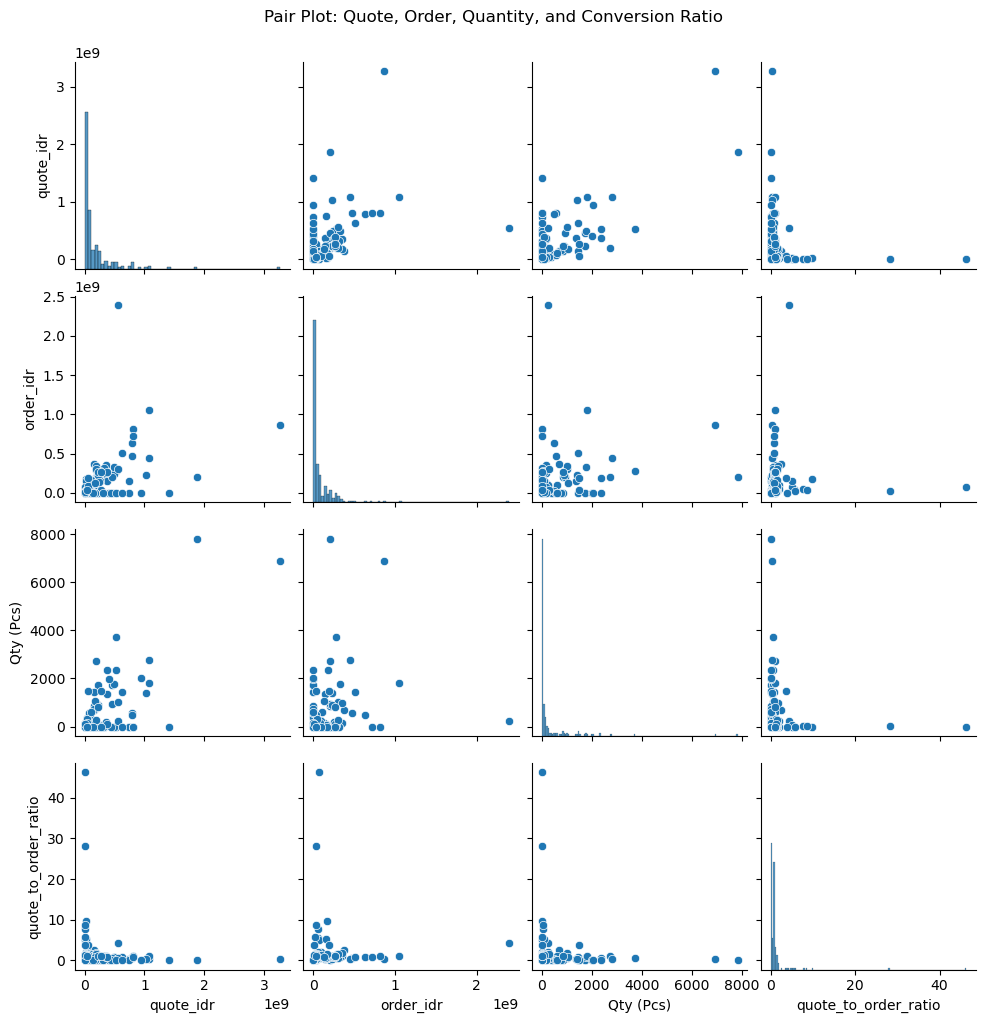

In [166]:
# Select only complete numeric + categorical rows
pair_data = aggregated_df[["quote_idr", "order_idr", "Qty (Pcs)", "quote_to_order_ratio", "area", "customer_category"]].dropna()

# Keep only wanted variables and create pair plot
sns.pairplot(pair_data[["quote_idr", "order_idr", "Qty (Pcs)", "quote_to_order_ratio"]])
plt.suptitle("Pair Plot: Quote, Order, Quantity, and Conversion Ratio", y=1.02)
plt.show()

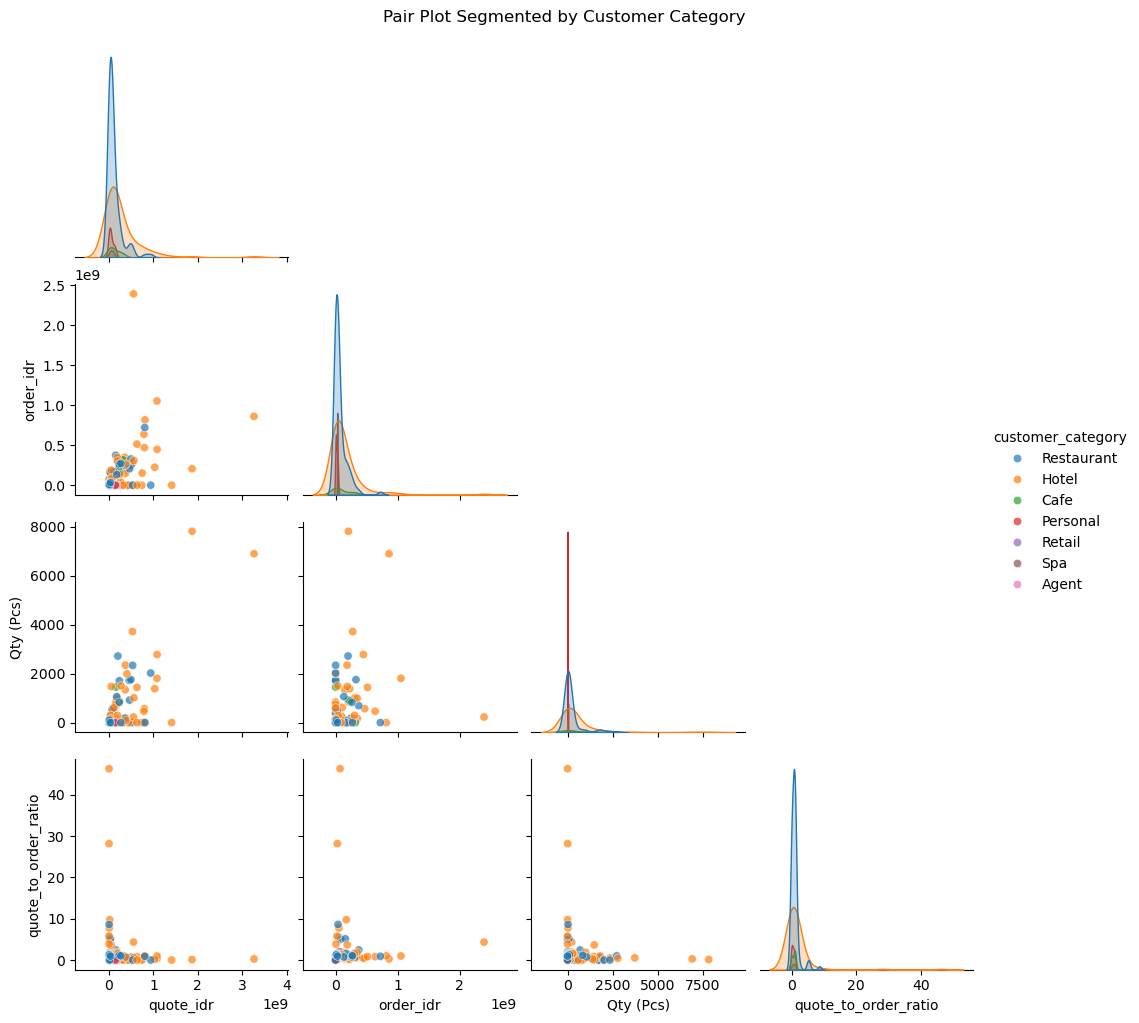

In [172]:
# Segmented pair plot by customer_category
sns.pairplot(pair_data, hue="customer_category", diag_kind="kde", corner=True, plot_kws={"alpha": 0.7})
plt.suptitle("Pair Plot Segmented by Customer Category", y=1.02)
plt.show()

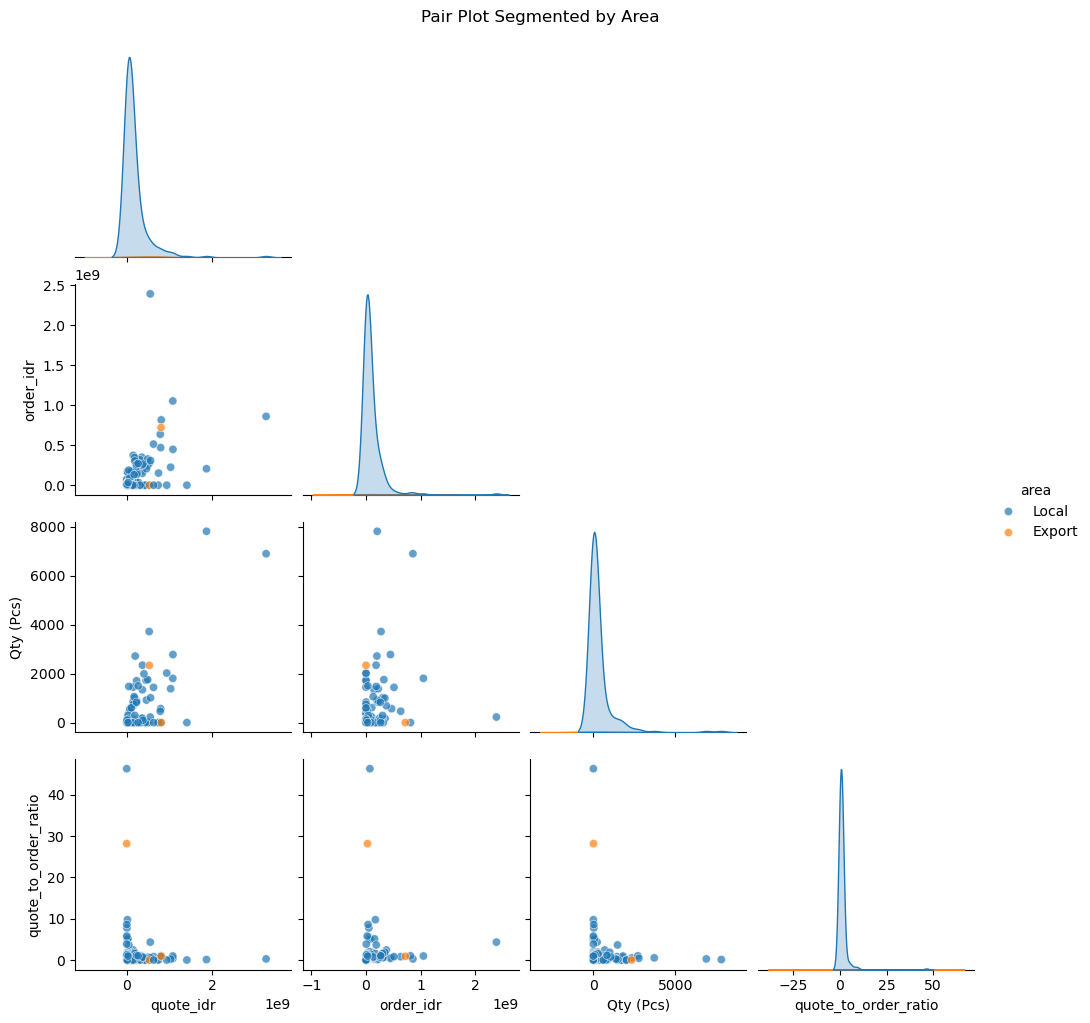

In [174]:
# Segemented pair plot by area
sns.pairplot(pair_data, hue="area", diag_kind="kde", corner=True, plot_kws={"alpha": 0.7})
plt.suptitle("Pair Plot Segmented by Area", y=1.02)
plt.show()

## Pair Plot Interpretation

The pair plots above visualize relationships between key numerical variables (`quote_idr`, `order_idr`, `Qty (Pcs)`, `quote_to_order_ratio`) across all clients. The diagonals show variable distributions, and the lower triangles show their pairwise relationships.

---

### Distribution Insights

- **All variables are strongly right-skewed**, especially `quote_idr` and `order_idr`, which are heavily concentrated at the low end with a few extreme high-value outliers.
- **`Qty (Pcs)`** shows a similar pattern — most clients order low quantities, with rare very high-volume orders.
- **`quote_to_order_ratio`** is tightly clustered near 0–2 but contains a few extreme values (>20), indicating either large follow-up orders or very low initial quotes.

---

### Relationship Insights

- **`quote_idr` vs `order_idr`** shows a positive trend: higher quotes are loosely associated with higher orders, but there's significant variance.
- **`quote_idr` vs `Qty (Pcs)`** also shows a moderate relationship: larger quotes generally correspond with larger quantities.
- **`quote_to_order_ratio`** appears largely independent of other variables, suggesting conversion efficiency isn’t directly related to quote/order size or quantity.

---

### Segment-Level Observations

- **Customer Category Segmentation**:
  - *Hotels* and *Restaurants* are the dominant categories.
  - No strong separation in behavior is visible between categories, but **hotels** appear more likely to produce larger quotes and orders.
  
- **Area Segmentation (Local vs Export)**:
  - *Local* clients dominate the dataset.
  - *Export* clients are few but show up in higher-value ranges — potentially high-value, low-volume customers worth further exploration.

---

### Variables Worth Exploring Further

1. **`quote_to_order_ratio`**:
   - While visually flat, its outliers may reveal interesting client behavior — e.g., overordering or underquoting.
   - Could be more meaningful when analyzed by customer type or region.

2. **`Qty (Pcs)` vs `quote_idr`**:
   - The wide spread suggests different pricing strategies — useful for segmentation or clustering.

3. **`area` and `customer_category`**:
   - While subtle in pair plots, further analysis may reveal trends in order conversion or average quote size by group.

---


## 6. Categorical Plots

In [197]:
# Quote categories
aggregated_df.loc[aggregated_df["quote_idr"] < 50_000_000, "quote_tier"] = "Low"
aggregated_df.loc[(aggregated_df["quote_idr"] >= 50_000_000) & (aggregated_df["quote_idr"] <= 200_000_000), "quote_tier"] = "Medium"
aggregated_df.loc[aggregated_df["quote_idr"] > 200_000_000, "quote_tier"] = "High"

# Order categories
aggregated_df.loc[aggregated_df["order_idr"] < 50_000_000, "order_tier"] = "Low"
aggregated_df.loc[(aggregated_df["order_idr"] >= 50_000_000) & (aggregated_df["order_idr"] <= 200_000_000), "order_tier"] = "Medium"
aggregated_df.loc[aggregated_df["order_idr"] > 200_000_000, "order_tier"] = "High"

# Conversion ratio categories
aggregated_df.loc[aggregated_df["quote_to_order_ratio"] < 0.5, "conversion_tier"] = "Low"
aggregated_df.loc[(aggregated_df["quote_to_order_ratio"] >= 0.5) & (aggregated_df["quote_to_order_ratio"] <= 1.5), "conversion_tier"] = "Medium"
aggregated_df.loc[aggregated_df["quote_to_order_ratio"] > 1.5, "conversion_tier"] = "High"

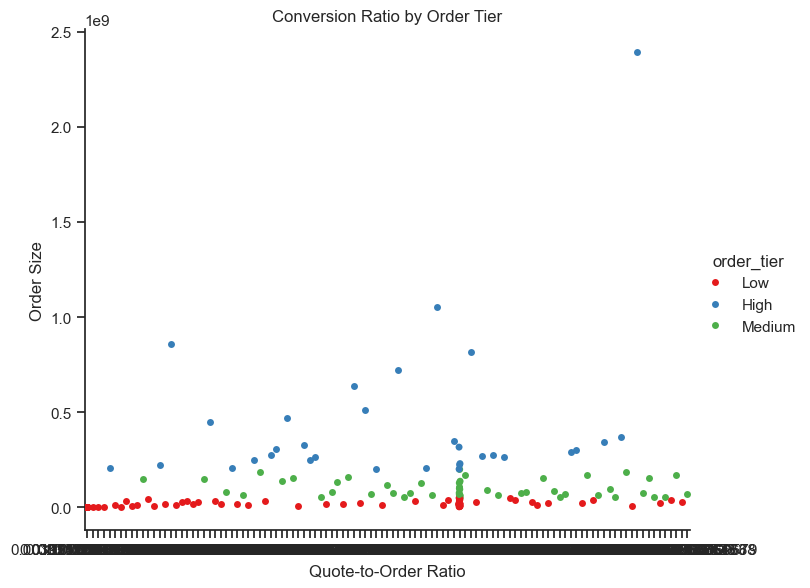

In [221]:
# Explore whether higher order tiers result in more efficient quote-to-order conversion
sns.catplot(
    data=aggregated_df,
    y="order_idr",
    x="quote_to_order_ratio",
    hue = "order_tier",
    kind="strip",
    jitter=True,
    palette="Set1",
    height=6,
    aspect=1.2
)
plt.title("Conversion Ratio by Order Tier")
plt.ylabel("Order Size")
plt.xlabel("Quote-to-Order Ratio")
plt.show()

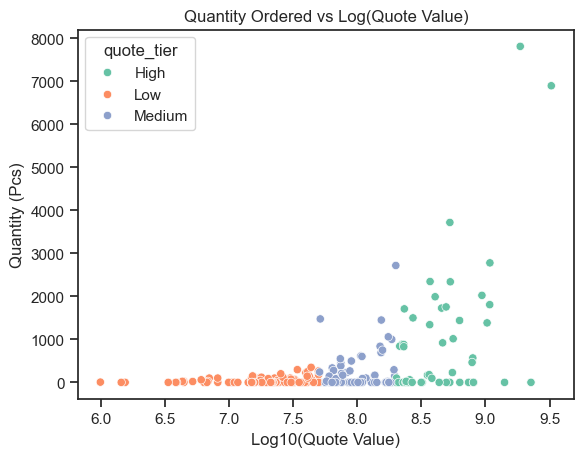

In [233]:
# Explore whether higher order tiers result in more efficient quote-to-order conversion
filtered = aggregated_df[aggregated_df["quote_idr"] > 0].copy()
filtered["log_quote"] = np.log10(filtered["quote_idr"])

sns.scatterplot(
    data=filtered,
    x="log_quote",
    y="Qty (Pcs)",
    hue="quote_tier",
    palette="Set2"
)
plt.title("Quantity Ordered vs Log(Quote Value)")
plt.xlabel("Log10(Quote Value)")
plt.ylabel("Quantity (Pcs)")
plt.show()


C:\Users\daxma\AppData\Local\Temp\ipykernel_11492\4204440900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


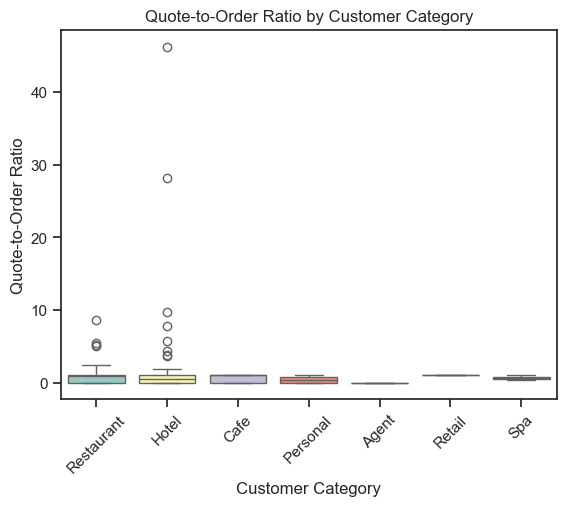

In [243]:
# Compare conversion efficiency between hotels and restaurants
sns.boxplot(
    data=aggregated_df,
    x="customer_category",
    y="quote_to_order_ratio",
    palette="Set3"
)
plt.title("Quote-to-Order Ratio by Customer Category")
plt.xlabel("Customer Category")
plt.ylabel("Quote-to-Order Ratio")
plt.xticks(rotation=45)
plt.show()

C:\Users\daxma\AppData\Local\Temp\ipykernel_11492\1639923223.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


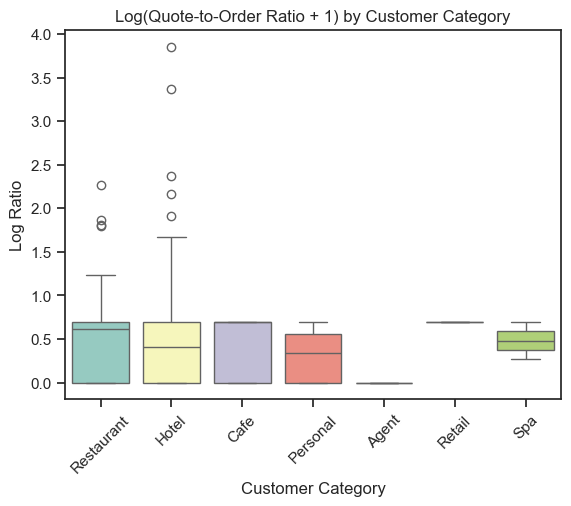

In [247]:
# Add small constant if 0s exist to make graph more interpretable
aggregated_df["log_ratio"] = np.log1p(aggregated_df["quote_to_order_ratio"])

sns.boxplot(
    data=aggregated_df,
    x="customer_category",
    y="log_ratio",
    palette="Set3"
)
plt.title("Log(Quote-to-Order Ratio + 1) by Customer Category")
plt.xlabel("Customer Category")
plt.ylabel("Log Ratio")
plt.xticks(rotation=45)
plt.show()


C:\Users\daxma\AppData\Local\Temp\ipykernel_11492\2785443532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


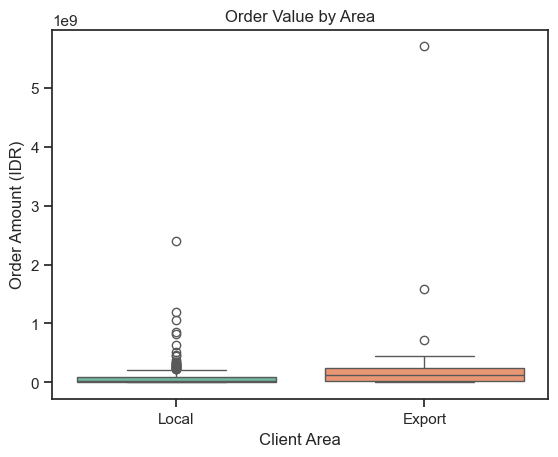

In [249]:
# Compare order values between Local and Export clients
sns.boxplot(
    data=aggregated_df,
    x="area",
    y="order_idr",
    palette="Set2"
)
plt.title("Order Value by Area")
plt.xlabel("Client Area")
plt.ylabel("Order Amount (IDR)")
plt.show()

C:\Users\daxma\AppData\Local\Temp\ipykernel_11492\4133364547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


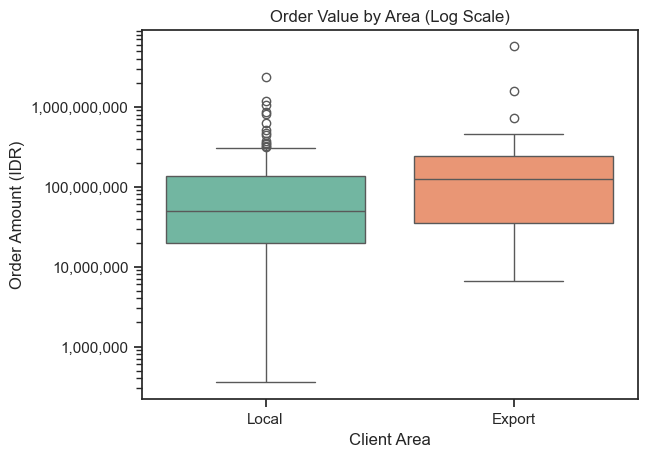

In [253]:
import matplotlib.ticker as ticker

# Filter out zero or negative values to make graph more interpretable
log_filtered = aggregated_df[aggregated_df["order_idr"] > 0]

sns.boxplot(
    data=log_filtered,
    x="area",
    y="order_idr",
    palette="Set2"
)
plt.yscale("log")
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y):,}'))
plt.title("Order Value by Area (Log Scale)")
plt.xlabel("Client Area")
plt.ylabel("Order Amount (IDR)")
plt.show()

## Insights from Categorical and Log-Scaled Visualizations

### 1. Quantity Ordered vs Log(Quote Value), Colored by Quote Tier
There is a clear trend: **higher quote tiers correlate with larger quantities ordered**. Low-quote clients tend to order fewer than 200 pieces, while high-quote clients regularly exceed 1,000 pieces. This pattern supports the logical relationship between quote value and order scale, reinforcing the utility of the `quote_tier` segmentation.

### 2. Quote-to-Order Ratio by Customer Category (Log-Scaled)
Most customer categories, especially Restaurants, Hotels, and Cafes, cluster around a quote-to-order ratio below 1. This suggests a tendency toward **underordering relative to quotes**. However, **Spas and Retail clients show relatively higher conversion ratios**, indicating they may order more than they’re quoted or are given lower quotes relative to order size. Outliers in the Hotel segment stand out as high converters, placing orders 2–4× larger than their quoted amounts. These may represent strong upselling and/or underestimated quotes.

### 3. Order Value by Area (Log-Scaled)
Export clients generally place **larger orders** than local clients, as seen from the higher median and tighter upper quartile range in the Export group. The spread is more variable among Local clients, with many small-to-medium orders and a few extreme outliers. This suggests Export clients may be higher-value, more consistent buyers, while Local clients vary more in scale.

---

### Summary
These visualizations validate key assumptions: Export clients place larger orders, some customer categories convert more efficiently than others, and quote value is a reasonable proxy for order scale. These insights will inform segmentation strategies and regression model design in the next steps.


## 7. Initial Analysis and Questions Responses

### Questions and Answers

- **Are certain customer categories or areas more likely to convert quotations to orders?**  
  Yes. Exploratory visuals show that **Spas and Retail clients** often have higher quote-to-order ratios, while **Export clients** place significantly larger and more consistent orders than Local clients.

- **Do clients who receive higher-value quotations place higher-value orders?**  
  Yes. Scatterplots and strip plots show a positive relationship between quote and order values. Higher quote tiers correlate with higher order values and larger quantities.

- **Do high quote tiers align with larger quantities?**  
  Yes. Clients in the “High Quote” tier typically order far more items, validating the link between quote value and quantity.

- **Do Local and Export clients behave differently?**  
  Yes. **Export clients tend to place larger orders** and show a narrower value range, while **Local clients show greater variability** in order value.

- **Do some clients consistently order more than they were quoted?**  
  Yes. Several outliers, especially within the Hotel category, show quote-to-order ratios well above 1, suggesting upselling or underquoted estimates.

- **Do Hotels or Restaurants convert more efficiently?**  
  Hotels generally have moderate conversion ratios, but also include outliers with very high ratios. Restaurants tend to convert more consistently but with lower average values.

---

### New Questions That Have Arisen

- **Are specific customer categories driving extreme quote-to-order ratios (either high or low)?**

- **Do high-conversion clients also represent high revenue potential, or are they mostly small-scale over-performers?**

- **Is there a relationship between quote tier and conversion efficiency (e.g., are high-quote clients less likely to convert fully)?**

- **Can area (Local vs Export) predict order consistency or variability better than quote value?**

- **Which client segments show the most reliable conversion behaviour and which show the most volatility?**



## 8. Define Hypotheses for Further Analysis

Based on the exploratory analysis conducted so far, the following hypotheses have been developed. These will be formally tested in subsequent phases using regression and clustering techniques.

### Quote & Order Relationship
**H1:** Clients who receive higher quotation amounts will place higher-value orders.  
→ A positive linear relationship is expected between `quote_idr` and `order_idr`.

**H2:** Clients who receive higher-value quotations will also tend to order larger quantities (`Qty (Pcs)`).

---

### Segment-Based Conversion Behavior
**H3:** Export clients are more likely than Local clients to place high-value orders.  
→ Export area is associated with higher `order_idr` on average.

**H4:** Customer categories such as Spas and Retail will exhibit higher quote-to-order ratios than Restaurants and Cafés.

**H5:** Hotels show more variability in conversion efficiency than other customer types.  
→ Greater standard deviation in `quote_to_order_ratio` among Hotels.

---

### Conversion & Tier-Based Behavior
**H6:** Clients in higher `order_tier` groups will tend to have higher `quote_to_order_ratio` values.  
→ High-order clients are also more efficient converters.

**H7:** Clients in the lowest `quote_tier` will display the widest range of conversion behaviour, some under-ordering, others significantly over-ordering.

**H8:** Quote-to-order ratio can be predicted using a combination of quote value, client area, and customer category.  
→ A multivariate regression model could be used to test this.



## 9. Export Dataframe

In [274]:
# Export dataframe
aggregated_df.to_csv(os.path.join(path, "02 Data", "Prepared Data", "6.2", "aggregated_client_data.csv"))